**MATPLOTLIB** - VISUALIZING DATA

In [47]:
# Install Datasets Library
# !pip install datasets

# Importing Libraries
import pandas as pd
from datasets import load_dataset

# Loading Data
dataset = load_dataset('lukebarousse/data_jobs')
df = dataset['train'].to_pandas()

# Data Cleanup
df['job_posted_date'] = pd.to_datetime(df['job_posted_date'])

Checking whether matplotlib is installed already:

In [48]:
!pip list

Package                                  Version
---------------------------------------- -------------------
absl-py                                  1.4.0
absolufy-imports                         0.3.1
accelerate                               1.11.0
aiofiles                                 24.1.0
aiohappyeyeballs                         2.6.1
aiohttp                                  3.13.1
aiosignal                                1.4.0
alabaster                                1.0.0
albucore                                 0.0.24
albumentations                           2.0.8
ale-py                                   0.11.2
alembic                                  1.17.0
altair                                   5.5.0
annotated-types                          0.7.0
antlr4-python3-runtime                   4.9.3
anyio                                    4.11.0
anywidget                                0.9.18
argon2-cffi                              25.1.0
argon2-cffi-bindings               

In [49]:
import matplotlib.pyplot as plt
import numpy as np


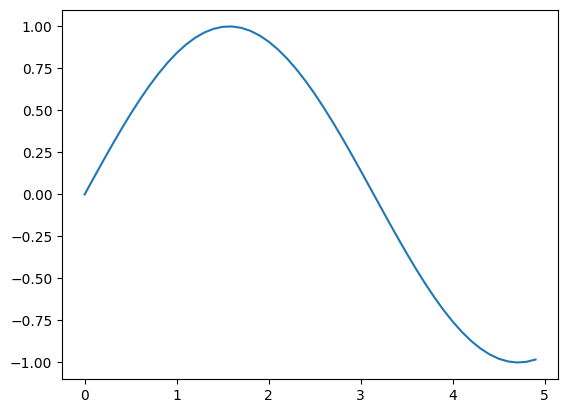

In [50]:
x = np.arange(0, 5, 0.1)
y = np.sin(x)
plt.plot(x, y)


In [51]:
# Install Datasets Library
# !pip install datasets

# Importing Libraries
import pandas as pd
from datasets import load_dataset
import matplotlib.pyplot as plt


# Loading Data
dataset = load_dataset('lukebarousse/data_jobs')
df = dataset['train'].to_pandas()

# Data Cleanup
df['job_posted_date'] = pd.to_datetime(df['job_posted_date'])

Simple Example

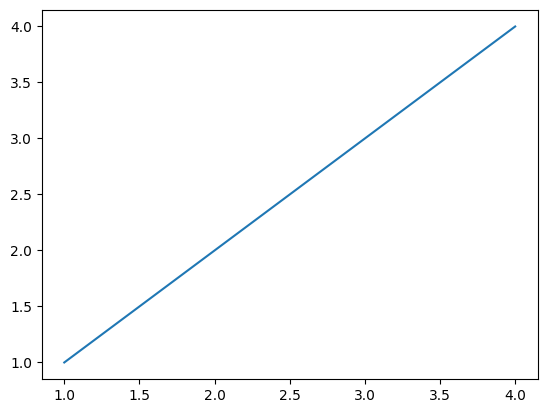

In [52]:
x = [1, 2, 3, 4]
y = [1, 2, 3, 4]

plt.plot(x, y)
plt.show()

In [53]:
df.job_posted_date.head()

,job_posted_date
0,2023-06-16 13:44:15
1,2023-01-14 13:18:07
2,2023-10-10 13:14:55
3,2023-07-04 13:01:41
4,2023-08-07 14:29:36


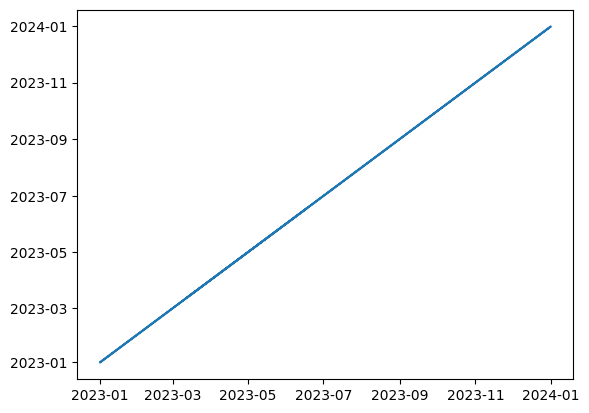

In [54]:
plt.plot(df.job_posted_date, df.job_posted_date)
plt.show()

Let's see how many job postings are happening relative to the job posted date

In [55]:
date_counts = df.job_posted_date.value_counts()

date_counts = date_counts.sort_index()

Plotting it...........

In [56]:
date_counts

,count
job_posted_date,
2023-01-01 00:00:04,1
2023-01-01 00:00:07,1
2023-01-01 00:00:22,1
2023-01-01 00:00:24,1
2023-01-01 00:00:27,1
...,...
2023-12-31 23:40:18,2
2023-12-31 23:40:22,2
2023-12-31 23:40:31,2


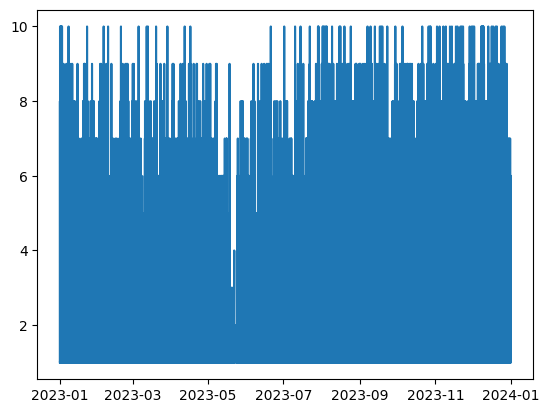

In [57]:
plt.plot(date_counts.index, date_counts)
plt.show()

It's literally a Hot Mess!!! Let's aggregate the data by month

In [58]:
df['job_posted_month'] = df['job_posted_date'].dt.month

In [59]:
monthly_counts = df.job_posted_month.value_counts()

monthly_counts = monthly_counts.sort_index()

monthly_counts

,count
job_posted_month,
1,91822
2,64578
3,64084
4,62919
5,52104
6,61572
7,63777
8,75162
9,62359


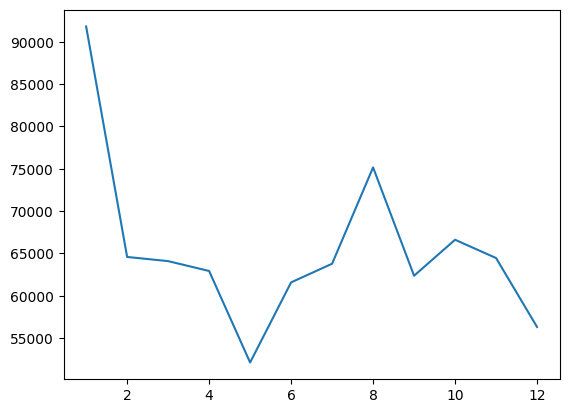

In [60]:
plt.plot(monthly_counts.index, monthly_counts.values)
plt.show()



---


**SERIES vs DATAFRAME**   
* One-Dimensional  
* Indexed  
* Diverse Data Types

In [61]:
series = pd.Series([10, 20, 30, 40, 50], index = ['a', 'b', 'c', 'd', 'e'])

In [62]:
series.index

Index(['a', 'b', 'c', 'd', 'e'], dtype='object')

In [63]:
series.values

array([10, 20, 30, 40, 50])

From here, we can understand that: job_posted_date is a Series here!  
So, a column of data within a dataframe is also known as a Series.\\

---



**BAR CHART** - Counts of Job Postings

Before making Bar Charts, we are going to be plotting how many counts of different job title we have:

In [64]:
df.job_title_short

,job_title_short
0,Senior Data Engineer
1,Data Analyst
2,Data Engineer
3,Data Engineer
4,Data Engineer
...,...
785736,Software Engineer
785737,Data Analyst
785738,Business Analyst
785739,Data Engineer


Let's aggregate these....

In [65]:
job_counts = df.job_title_short.value_counts()

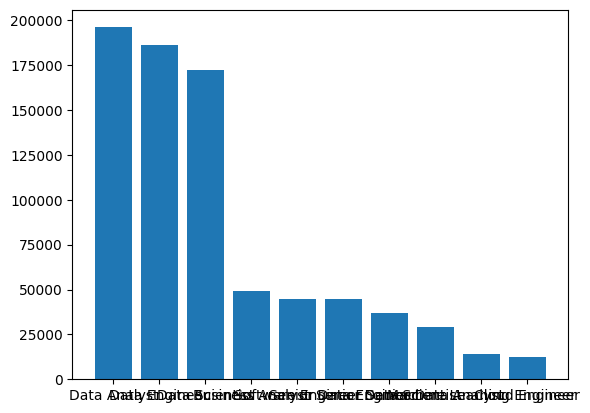

In [66]:
plt.bar(job_counts.index, job_counts)
plt.show()

It's a MESS!!   
Let's make it horizontal.

<BarContainer object of 10 artists>

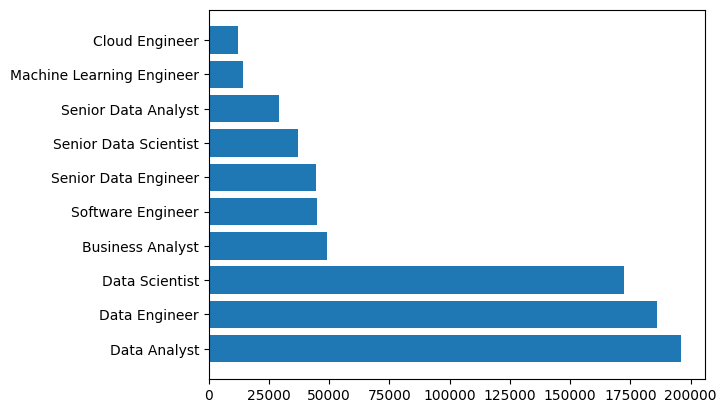

In [67]:
plt.barh(job_counts.index, job_counts)

Making the bars ascending........

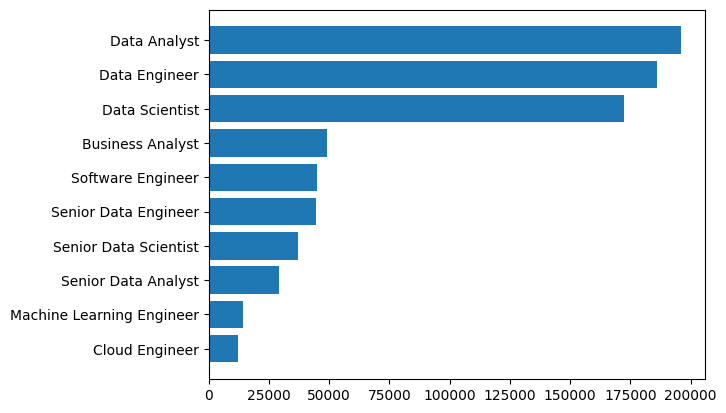

In [68]:
job_counts = job_counts.sort_values(ascending = True)

plt.barh(job_counts.index, job_counts)
plt.show()

**MATPLOTLIB: LABELING**

Earlier our bar chart was looking like this.....

In [69]:
job_counts = df.job_title_short.value_counts()

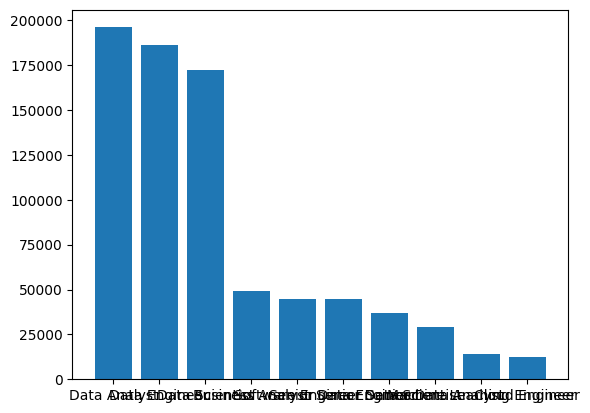

In [70]:
plt.bar(job_counts.index, job_counts)
plt.show()

Let's try to make it a little nicer.........

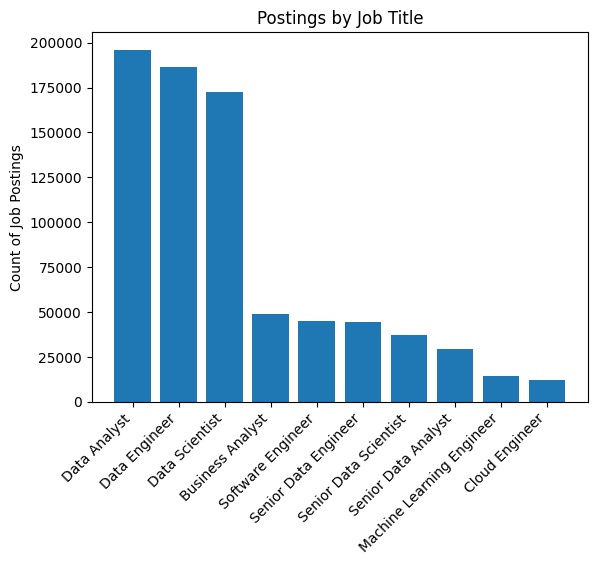

In [71]:
plt.bar(job_counts.index, job_counts)
plt.title('Postings by Job Title')            # Adding a title to the bar chart
plt.ylabel('Count of Job Postings')          # Labelling the y-axis of the chart
plt.xticks(rotation = 45, ha = 'right')                   # Rotating the x-axis labels and aligning it with the bars
plt.show()

**MATPLOTLIB + PANDAS Plotting**

Series

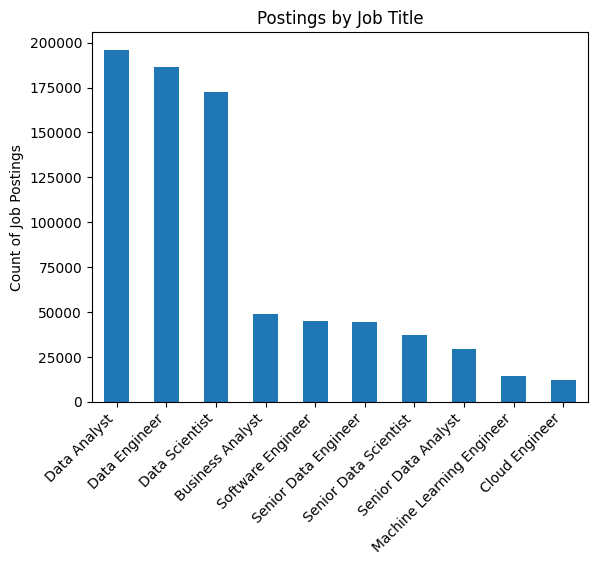

In [72]:
job_counts.plot(kind = 'bar')                     # simpler then before
plt.title('Postings by Job Title')            # Adding a title to the bar chart
plt.ylabel('Count of Job Postings')          # Labelling the y-axis of the chart
plt.xlabel('')
plt.xticks(rotation = 45, ha = 'right')                   # Rotating the x-axis labels and aligning it with the bars
plt.show()

DataFrame

In [73]:
df[['job_posted_date', 'salary_year_avg']].dropna(subset = ['salary_year_avg'])

,job_posted_date,salary_year_avg
28,2023-08-01 13:37:57,109500.0
77,2023-06-26 14:22:54,140000.0
92,2023-02-21 13:29:59,120000.0
100,2023-07-31 13:01:18,228222.0
109,2023-10-12 13:02:19,89000.0
...,...,...
785624,2023-08-31 06:02:16,139216.0
785641,2023-01-04 16:36:07,150000.0
785648,2023-04-12 06:02:51,221875.0
785682,2023-03-04 06:16:08,157500.0


<Axes: xlabel='job_posted_date'>

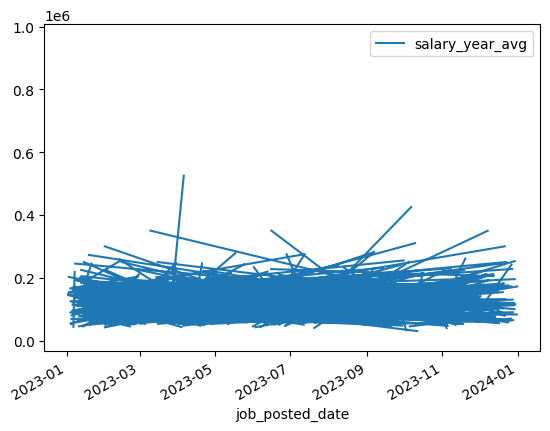

In [74]:
df.plot(x = 'job_posted_date', y = 'salary_year_avg', kind = 'line')